# Topic 3. Algebraic data types

## 3.3 Sum types

Let's consider the following types: 
* `WeekDay`: all days of the week, excluding Saturday and Sunday, i.e. _Monday_, _Tuesday_, etc., until _Friday_.
* `Shape`: a geometric shape may be a _circle_, a _rectangle_ or an _ellipse_.
* `HttpCommand`: An http command may consists of a _Get_, _Post_, _Delete_ or _Put_ request.
* `Number`: a number may be a _natural_ number, _integer_, _fractional_, _real_, or _complex_ number.

In all these cases, a value of the corresponding type consists of a value of one of a number of types. For instance, a value of type `HttpCommand` may be a value of type `Get`, `Post`, `Delete` __or__ `Put`. Similarly, a `Number` may be a `Natural`, `Integer`, `Rational`, `Real`  or `Complex` numbers. These types are called _sum_ types. They contrast with the case of product types, which are constructed using a value for _each_ of its component types. For instance, a complex number is constructed with the _real_ __and__ the _imaginary_ parts. 

In [ ]:
val weekDay: WeekDay = lunes
val w2: WeekDay = martes
// ... 

In [12]:
case class Circle(r: Int)
case class Rectangle(w: Int, h: Int)
case class Ellipse(/*...*/)

type Shape = Any

val f1: Shape = Circle(5)
val f2: Shape = Rectangle(6,3)
// ... 

defined class Circle
defined class Rectangle
defined class Ellipse
defined type Shape
f1: Any = Circle(r = 5)
f2: Any = Rectangle(w = 6, h = 3)

In [13]:
type Shape = Circle Either Rectangle Either Ellipse // ... 

case class Lunes()
case class Martes()
case class Miércoles()
type WeekDay = Lunes Either Martes Either Miércoles // ... 

defined type Shape
defined class Lunes
defined class Martes
defined class Miércoles
defined type WeekDay

In [14]:
type Shape = Either[Circle, Either[Rectangle, Ellipse]]
type Shape2 = Circle Either Rectangle Either Ellipse

defined type Shape
defined type Shape2

In [15]:
val c: Shape = Left(Circle(5))


c: Either[Circle, Either[Rectangle, Ellipse]] = Left(value = Circle(r = 5))

In [16]:
val f2: Shape = Right(Left(Rectangle(6,4)))
lazy val f3: Shape = Right(??? : Either[Rectangle, Ellipse])
lazy val f3: Shape = Right(Right(??? : Ellipse) : Either[Rectangle, Ellipse])
val f4: Shape = Right(Right(Ellipse()))

-- [E120] Naming Error: cmd17.sc:3:9 -------------------------------------------
3 |lazy val f3: Shape = Right(Right(??? : Ellipse) : Either[Rectangle, Ellipse])
  |         ^
  |       Double definition:
  |       lazy val f3: cmd17.this.cmd14.Shape in class Helper at line 156 and
  |       lazy val f3: cmd17.this.cmd14.Shape in class Helper at line 157
Compilation Failed

In [17]:
val r: Rectangle = Rectangle(1,4)

r: Rectangle = Rectangle(w = 1, h = 4)

In [18]:
val width: Int = r.w
val height: Int = r.h


width: Int = 1
height: Int = 4

In [20]:
def kind(s: Shape): String = 
    s match 
        case Left(c: Circle) => ??? : String
        case Right(e: Either[Rectangle, Ellipse]) => 
            ??? : String 


defined function kind

In [19]:
def kind(s: Shape): String = 
    s match 
        case Left(c: Circle) => ??? : String
        case Right(e: Either[Rectangle, Ellipse]) => 
            e match 
                case Left(r: Rectangle) => ??? /* r.w, r.h */: String 
                case Right(e: Ellipse) => ??? : String


defined function kind

In [19]:
def kind(s: Shape): String = 
    s match 
        case Left(Circle(r: Int)) => ??? : String
        case Right(e: Either[Rectangle, Ellipse]) => 
            e match 
                case Left(Rectangle(w: Int, h: Int)) => ??? : String 
                case Right(Ellipse()) => ??? : String


defined function kind

In [21]:
def kind(s: Shape): String = 
    s match 
        case Left(Circle(r)) => ??? : String
        case Right(e: Either[Rectangle, Ellipse]) => 
            e match 
                case Left(Rectangle(w, h)) => ??? : String 
                case Right(Ellipse()) => ??? : String


defined function kind

In [22]:
def kind(s: Shape): String = 
    s match 
        case Left(Circle(r))              => ??? : String
        case Right(Left(Rectangle(w, h))) => ??? : String 
        case Right(Right(Ellipse()))      => ??? : String 

defined function kind

In [28]:
val kind: Shape => String = (s: Shape) => 
    s match 
        case Left(Circle(r))              => ??? : String
        case Right(Left(Rectangle(w, h))) => ??? : String 
        case Right(Right(Ellipse()))      => ??? : String 

kind: Shape => String = ammonite.$sess.cmd28$Helper$$Lambda/0x00000070019cd150@526d086

In [29]:
val kind: Shape => String = 
    case Left(Circle(r))              => ??? : String
    case Right(Left(Rectangle(w, h))) => ??? : String 
    case Right(Right(Ellipse()))      => ??? : String 

kind: Shape => String = ammonite.$sess.cmd29$Helper$$Lambda/0x00000070019cddb8@57c078f1

In [25]:
def kind(s: Shape): String = 
    s match 
        case Left(Circle(r))              => "circle" : String
        case Right(Left(Rectangle(w, h))) => "rectangle" : String 
        // case Right(Right(Ellipse()))      => "ellipse" : String 

-- [E029] Pattern Match Exhaustivity Warning: cmd25.sc:2:4 ---------------------
2 |    s match 
  |    ^
  |    match may not be exhaustive.
  |
  |    It would fail on pattern case: Right(Right(_))
  |
  | longer explanation available when compiling with `-explain`


defined function kind

In [26]:

kind(Left(Circle(1))) == "circle"
kind(Right(Left(Rectangle(1,2)))) == "rectangle"


res26_0: Boolean = true
res26_1: Boolean = true

In [27]:
kind(Right(Right(Ellipse()))) == "ellipse"

scala.MatchError: Right(Right(Ellipse())) (of class scala.util.Right)

### Constructor and destructors of sum types

Formally, given types `A` and `B`, the sum type `Either[A, B]` (also written in infix notation as `A Either B`) represents **either** a value of type `A` **or** a value of type `B`. The constructors and destructors of sum types are shown in the following table, alongside the ones for product and function types to facilitate comparison.


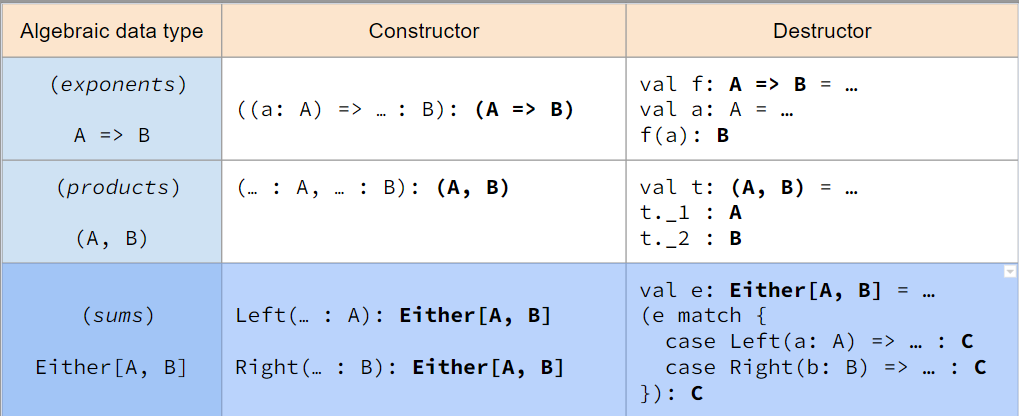

We can create a value of type `A Either B` either with a value of type `A` or a value of type `B`, using the `Left` and `Right` constructors, respectively. In order to extract, destroy or consume information from a sum value we have to _pattern match_ the sum value in order to know the actual value. This match expression basically says: if I know how to obtain a `C` from `A`, and I know how to obtain a `C` from `B`, then I know how to obtain a `C` from `Either[A, B]`.

For instance, we may define the `Number` type as follows: 

In [30]:
type Number = Either[IntegerNumber, Either[Fraction, Either[Double, Complex]]]

// where
type IntegerNumber = Int
type Fraction = (Int, Int)
type Complex = (Double, Double)

defined type Number
defined type IntegerNumber
defined type Fraction
defined type Complex

Note that some of the types that make up the number definition are proper product types. Algebraically, $Number = Int + Int * Int + Double + Double * Double$.  

We can construct values of the `Number` type as follows: 

In [3]:
val i: Number = Left(1) // integer 1
val f: Number = Right(Left((1, 3))) // fraction 1/3
val d: Number = Right(Right(Left(scala.math.Pi))) // real π
val c: Number = Right(Right(Right((1.3, 1))))

i: Either[Int, Either[Fraction, Either[Double, Complex]]] = Left(value = 1)
f: Either[Int, Either[Fraction, Either[Double, Complex]]] = Right(
  value = Left(value = (1, 3))
)
d: Either[Int, Either[Fraction, Either[Double, Complex]]] = Right(
  value = Right(value = Left(value = 3.141592653589793))
)
c: Either[Int, Either[Fraction, Either[Double, Complex]]] = Right(
  value = Right(value = Right(value = (1.3, 1.0)))
)

Note the infix notation associates to the left: 

In [37]:
object Infix: 

    type Number = IntegerNumber Either Fraction Either Real Either Complex
    // type Number = ((IntegerNumber Either Fraction) Either Double) Either Complex

    // where
    type IntegerNumber = Int
    type Fraction = (Int, Int)
    type Real = Double
    type Complex = (Double, Double)

    val i: Number = Left(Left(Left(1)))
    val r: Number = Left(Left(Right(1,2)))
    val f: Number = Left(Right(3.9))
    val c: Number = Right(3.0, 3.9)

defined object Infix

Concerning destructors, we can illustrate pattern matching with the following function: 

In [4]:
def kind(n: Number): String = n match 
    case Left(i: Int) => "integer"
    case Right(e) => e match 
        case Left(f: (Int, Int)) => "rational"
        case Right(e) => e match 
            case Left(r: Double) => "real"
            case Right(c: (Double, Double)) => "complex"

defined function kind

In [5]:
kind(i) == "integer"
kind(f) == "rational"
kind(d) == "real"
kind(c) == "complex"

res5_0: Boolean = true
res5_1: Boolean = true
res5_2: Boolean = true
res5_3: Boolean = true

Nested pattern matching are cumbersome, so Scala offers the possibility of writing these expressions in a more compact way: 

In [6]:
def kind(n: Number): String = n match 
    case Left(i: Int) => "integer"
    case Right(Left(f: (Int, Int))) => "rational"
    case Right(Right(Left(r: Double))) => "real"
    case Right(Right(Right(c: (Double, Double)))) => "complex"

defined function kind

Also, note that can omit the `match` keyword when implementing functions over sum types using lambda expressions: 

In [7]:
def kind: Number => String =  
    case Left(i: Int) => "integer"
    case Right(Left(f: (Int, Int))) => "rational"
    case Right(Right(Left(r: Double))) => "real"
    case Right(Right(Right(c: (Double, Double)))) => "complex"

defined function kind

> ![image.png](../../images/scala3api3.jpg) More details on pattern matching in Scala can be found [here](https://docs.scala-lang.org/tour/pattern-matching.html). Also, note that we can create custom pattern matching expressions using so-called [_extractors_](https://docs.scala-lang.org/tour/extractor-objects.html). We won't need them in the course, but they can be really helpful to simplifiy and get more understandable pattern matching expressions. 

#### Exercise
<div class="alert alert-info">
    Implement the type of geometric <code>Shape</code>s, which can include values of types: 
    <li> Circle, specified by its radius
    <li> Ellipse, specified by its major and minor axis
    <li> Rectangle, specified by its width and height
        
Given three instances of shapes for each of the different variants, and implement a function which receives a geometric shape and returns its area. 
</div>

In [39]:
import scala.math.{Pi, pow}

import scala.math.{Pi, pow}


##### Solution

In [28]:
type Circle = Double
type Ellipse = (Double, Double)
type Rectangle = (Double, Double)

type Shape = Circle Either Ellipse Either Rectangle

defined type Circle
defined type Ellipse
defined type Rectangle
defined type Shape

In [29]:
val circle: Shape = Left(Left(1.0))
val ellipse: Shape = Left(Right((1.0, 2.0)))
val rectangle: Shape = Right(5, 4)

circle: Either[Either[Circle, Ellipse], Rectangle] = Left(
  value = Left(value = 1.0)
)
ellipse: Either[Either[Circle, Ellipse], Rectangle] = Left(
  value = Right(value = (1.0, 2.0))
)
rectangle: Either[Either[Circle, Ellipse], Rectangle] = Right(
  value = (5.0, 4.0)
)

In [40]:
def area: Shape => Double = 
    case Left(Left(radius)) => Pi * pow(radius, 2)
    case Left(Right(major, minor)) => Pi * major * minor
    case Right(width, height) => width * height 

defined function area

#### Your solution

### Enumeration types

The `Either` type is the most basic approach to define sum types in Scala. Sometimes, we will use _enumeration types_ to label the different variants more meaningfully. For instance, the `Number` type can be defined as follows: 

In [9]:
enum Number:
    case IntegerNum(i: Int)
    case Rational(num: Int, den: Int)
    case Real(d: Double)
    case Complex(real: Double, imaginary: Double)

defined class Number

Now, we can use less generic labels than `Left` and `Right` to create numbers: 

In [10]:
val i: Number = Number.IntegerNum(1)
val f: Number = Number.Rational(1, 3)
val d: Number = Number.Real(scala.math.Pi)
val c: Number = Number.Complex(1.3, 3.4)

i: Number = IntegerNum(i = 1)
f: Number = Rational(num = 1, den = 3)
d: Number = Real(d = 3.141592653589793)
c: Number = Complex(real = 1.3, imaginary = 3.4)

and these labels can of course be used in pattern matching: 

In [13]:
def kind: Number => String =  
    case Number.IntegerNum(i: Int) => "integer"
    case Number.Rational(num: Int, den: Int) => "rational"
    case Number.Real(r: Double) => "real"
    case Number.Complex(real: Double, imaginary: Double) => "complex"

defined function kind

Normally, we will use the following import statement to avoid writing `Number.Rational`, and simply write `Rational`, for instance. Also, note that Scala will issue a warning if some of the variants is omitted in the pattern matching:

In [14]:
import Number._

import Number._


In [15]:
def kind: Number => String =  
    case IntegerNum(i: Int) => "integer"
    case Rational(num: Int, den: Int) => "rational"
    case Real(r: Double) => "real"
    case Complex(real: Double, imaginary: Double) => "complex"

defined function kind

#### Exercise
<div class="alert alert-info">
    Implement the last exercise on geometric <code>Shape</code>s using enumeration types. 
</div>

##### Solution

In [42]:
type Circle = Double
type Ellipse = (Double, Double)
type Rectangle = (Double, Double)

enum Shape:
    case Circle(radius: Double)
    case Ellipse(major: Double, minor: Double)
    case Rectangle(width: Double, height: Double)

import Shape._

defined type Circle
defined type Ellipse
defined type Rectangle
defined class Shape
import Shape._


In [43]:
val circle: Shape = Circle(1.0)
val ellipse: Shape = Ellipse(1.0, 2.0)
val rectangle: Shape = Rectangle(5, 4)

circle: Shape = Circle(radius = 1.0)
ellipse: Shape = Ellipse(major = 1.0, minor = 2.0)
rectangle: Shape = Rectangle(width = 5.0, height = 4.0)

In [44]:
def area: Shape => Double = 
    case Circle(radius) => Pi * pow(radius, 2)
    case Ellipse(major, minor) => Pi * major * minor
    case Rectangle(width, height) => width * height 

defined function area

#### Your solution

### Standard sum types in Scala

Besides `Either`, the standard library of Scala provides another important sum type: [`Option`](https://www.scala-lang.org/api/current/scala/Option.html). These types can be defined using enumerations as follows:  

In [45]:
object StdSumTypes: 

    // Disclaimer: These are not the exact Scala definitions, since we omit variance annotations and case objects.

    // type Option[A] = A + 1 
    enum Option[A]: 
        case Some[A](a: A) extends Option[A]
        case None[A]() extends Option[A]

    // type Either[A, B] = A + B
    enum Either[A, B]: 
        case Left[A, B](a: A) extends Either[A, B]
        case Right[A, B](b: B) extends Either[A, B]

defined object StdSumTypes

These types are important for error handling. We will see how they allow us to get rid of exceptions, at least in the part of our code that we wish to be purely functional. Here it's a small example:

In [17]:
// Using exceptions

def divideWithExceptions(a: Double, b: Double): Double =
    if (b==0) throw new Exception("divide by cero")
    else a/b

defined function divideWithExceptions

In [17]:
// divideWithExceptions(5,0)

In [22]:
// Using option

def divideWithOption(a: Double, b: Double): Option[Double] =
    if (b==0) None 
    else Some(a/b)

defined function divideWithOption

We now return a value which indicates whether there was an error or not:

In [23]:
val maybeDouble: Option[Double] = 
    divideWithOption(5, 0)

maybeDouble: Option[Double] = None

In [24]:
// Using Either

def divideWithEither(a: Double, b: Double): Either[String, Double] =
    if (b==0) Left("Divide by cero")
    else Right(a/b)

defined function divideWithEither

And now a value which, in case of error indicates the reason:

In [25]:
val eitherDoubleOrString: Either[String, Double] = 
    divideWithEither(5,0)

eitherDoubleOrString: Either[String, Double] = Left(value = "Divide by cero")

### Why are sum types called _algebraic_ data types?

Since we can construct a value of a sum type `Either[A, B]`, either with a value of type `A`, or with a value of type `B`, the number of values of type `Either[A, B]` is equal to the number of values of type `A`, plus the number of values of type `B`: $|Either[A, B]|=|A|+|B|$.

For instance, how many values has the type `Boolean Either Boolean`? We can reason algebraically as follows: 

$|Boolean\,Either\, Boolean| = |Boolean| + |Boolean| = 2 + 2 = 4$

And these are the four values: 

In [26]:
val v1: Boolean Either Boolean = Left(false)
val v2: Boolean Either Boolean = Left(true)
val v3: Boolean Either Boolean = Right(false)
val v4: Boolean Either Boolean = Right(true)

v1: Either[Boolean, Boolean] = Left(value = false)
v2: Either[Boolean, Boolean] = Left(value = true)
v3: Either[Boolean, Boolean] = Right(value = false)
v4: Either[Boolean, Boolean] = Right(value = true)

#### Exercise
<div class="alert alert-info">
    Calculate algebraically the number of values of type <code>(Boolean Either Unit) => (Boolean, Unit)</code>. Which are those values?
</div>

##### Solution

Algebraically, we can calculate as follows: 

$|(Boolean\, Either\, Unit)\, =>\, (Boolean, Unit)|= \\
|(Boolean, Unit)|^{|(Boolean\, Either\, Unit)|} = \\
(|Boolean|*|Unit|)^{|Boolean| + |Unit|} = \\
2^3 = \\
8$

The different values are obtained by giving proper boolean values to the following template: 

In [49]:
val v1: (Boolean Either Unit) => (Boolean, Unit) = 
    case Left(false) => (??? : Boolean, (): Unit)
    case Left(true) => (??? : Boolean, (): Unit)
    case Right(()) => (??? : Boolean, (): Unit)

v1: Either[Boolean, Unit] => (Boolean, Unit) = ammonite.$sess.cell49$Helper$$Lambda$3241/1497862521@407fbeb1

#### Your solution

### The `0` type in Scala

If the unit type was the identity element for product types, is there any identity type for sums? It has to be a type which satisfies the following conditions: 

- $0 + A \cong A$
- $A + 0 \cong A$

But $|0 + A| = |0| + |A|$, so $|0| = 0$, i.e. the type $0$ must not be inhabited! In other words, it is a type such that there is no value of that type. 

We don't have to define this type in Scala ourselves, since the identity element of sums is already defined in the Scala standard library: it's the type `Nothing`. Since we can't create instances of this type, the only thing that we can do if we have to return a value of this type, or assign a variable of this type a value, is to throw an exception:

In [ ]:
lazy val impossible: Nothing = 
    throw new Exception("no value of type Nothing")

The `???` expression in Scala means essentially an exception of type `Nothing`. Also, note that `Nothing` is the botton of the [Scala inheritance hierarchy](https://docs.scala-lang.org/scala3/book/first-look-at-types.html#all-values-have-a-type), i.e. `Nothing` is a subclass of any Scala class. That's why we can use `???` in place of any value in Scala.

In [ ]:
def i: Int = ??? // throw new Exception("no value")

Algebraically, since the $Nothing$ type has no values, we don't have constructors for it. Concerning destructors, according to the last discussion, given a value of type $Nothing$ we can observe a value of any type. The following table summarises these results for the $Nothing$ type, alongside the constructors and destructors of the $Unit$ type to facilitate comparison: 

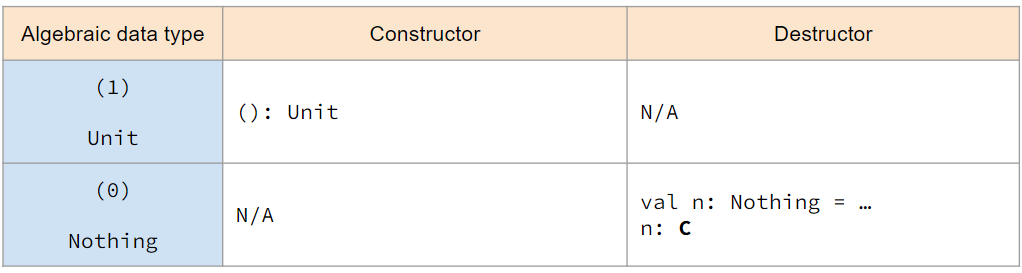

Basically, in the case of the $Unit$ type, we have one constructor but no destructor, whereas the situation is reversed in the case of the $Nothing$ type.

#### Exercise
<div class="alert alert-info">
    Calculate algebraically the number of values of type <code>(Boolean Either Nothing, Unit)</code>. Which are those values? Also implement a function which receives a value of this type and returns a value of type <code>Int</code>. 
</div>

##### Solution

Algebraically, we can calculate as follows: 

$|(Boolean\, Either\, Nothing, Unit)|= \\
|Boolean\, Either\, Nothing| * |Unit| = \\
(|Boolean| + |Nothing|) * |Unit| = \\
(2 + 0) * 1  = \\
2$

The different values are obtained by giving proper boolean values to the following template: 

In [50]:
val v1: (Boolean Either Nothing, Unit) = 
    (Left(false), ())

val v2: (Boolean Either Nothing, Unit) = 
    (Left(true), ())

v1: (Either[Boolean, Nothing], Unit) = (Left(value = false), ())
v2: (Either[Boolean, Nothing], Unit) = (Left(value = true), ())

In [54]:
def foo: (Boolean Either Nothing, Unit) => Int = 
    case (Left(false),_) => 0
    case (Left(true), _) => 0
    case (Right(n), _) => n // impossible

defined function foo

#### Your solution